In [ ]:
!pip install matplotlib --quiet

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from features import read_csv_from_7z, StoreFeatureService, ItemFeatureService


4.3.0


In [26]:

train_df = read_csv_from_7z('dataset/train.csv.7z')
train_df['date'] = pd.to_datetime(train_df['date'])

store_fs = StoreFeatureService()
item_fs = ItemFeatureService()

all_feature_services = [store_fs, item_fs]
for fs in all_feature_services:
    train_df = fs.join(train_df)


/Users/shumin/projects/grocery-sales-forecasting/features.py:23: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(io.BytesIO(data))


In [56]:
# Feature missing rate
train_df.isnull().mean()

id                    0.000000
date                  0.000000
store_nbr             0.000000
item_nbr              0.000000
unit_sales            0.000000
onpromotion           0.172575
city                  0.000000
state                 0.000000
cluster               0.000000
store_type            0.000000
family                0.000000
class                 0.000000
perishable            0.000000
unit_sales_clipped    0.000000
dtype: float64

In [30]:
# clip the label to 0.1 to 99.9 percentile
train_df['unit_sales_clipped'] = train_df['unit_sales'].clip(lower=train_df['unit_sales'].quantile(0.001), upper=train_df['unit_sales'].quantile(0.999))


## Distribution of sales

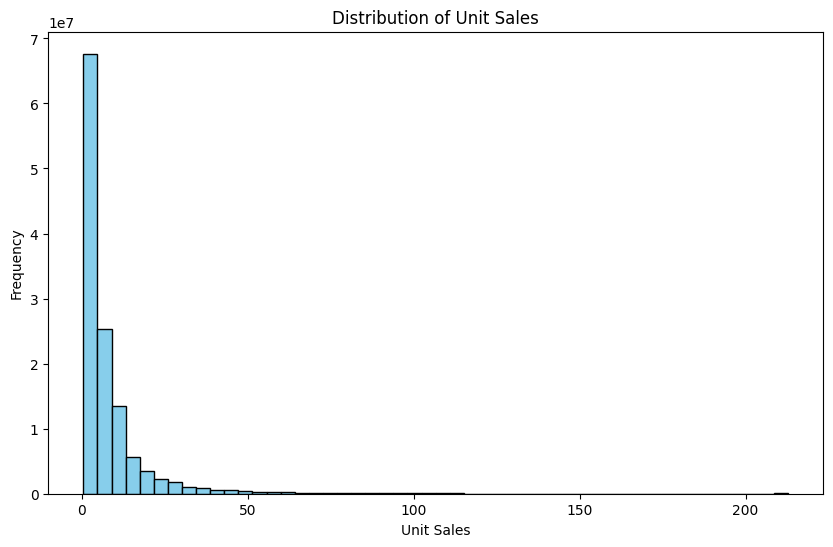

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(train_df['unit_sales_clipped'], bins=50,color='skyblue', edgecolor='k')
plt.xlabel('Unit Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Unit Sales')
plt.show()


# Store level performance

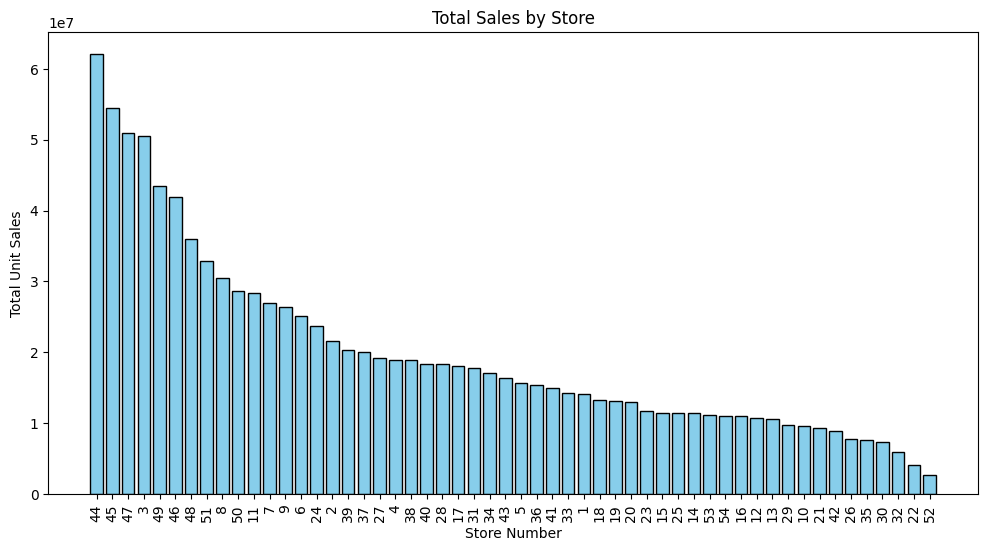

In [44]:
sales_by_store = train_df.groupby('store_nbr')['unit_sales'].sum().sort_values(ascending=False).reset_index()
sales_by_store['store_nbr'] = sales_by_store['store_nbr'].astype('str')
plt.figure(figsize=(12, 6))
plt.bar(sales_by_store['store_nbr'], sales_by_store['unit_sales'], color='skyblue', edgecolor='k')
plt.xlabel('Store Number')
plt.ylabel('Total Unit Sales')
plt.title('Total Sales by Store')
plt.xticks(rotation=90)

plt.show()

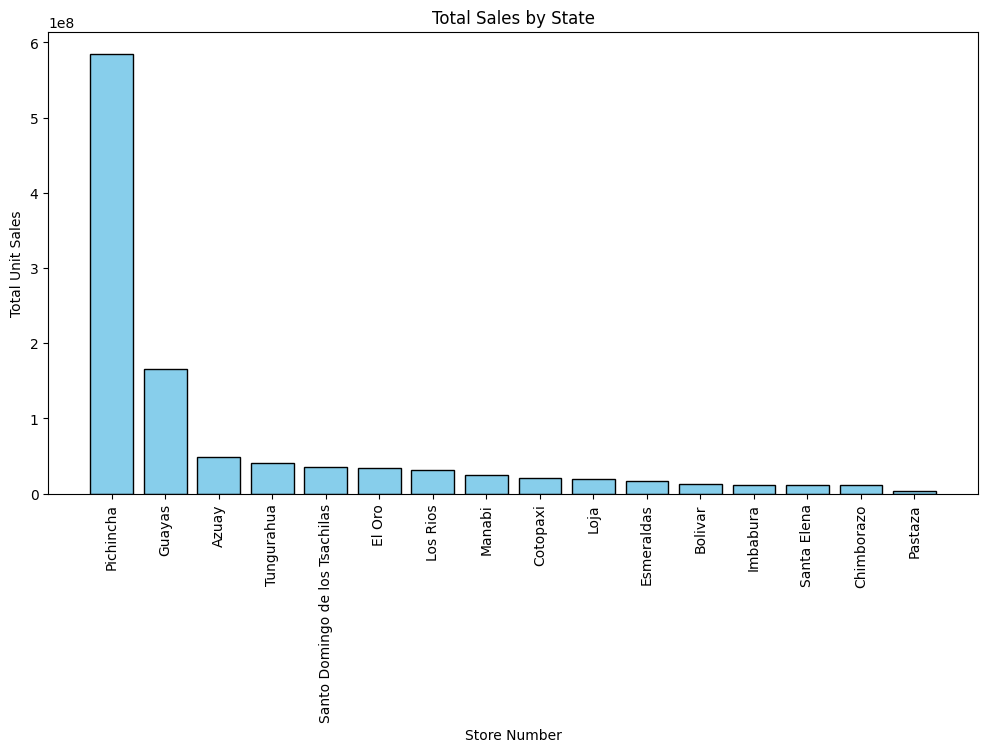

In [48]:
sales_by_store = train_df.groupby('state')['unit_sales'].sum().reset_index()
sales_by_store = train_df.groupby('state')['unit_sales'].sum().sort_values(ascending=False).reset_index()
sales_by_store['state'] = sales_by_store['state'].astype('str')

plt.figure(figsize=(12, 6))
plt.bar(sales_by_store['state'], sales_by_store['unit_sales'], color='skyblue', edgecolor='k')
plt.xlabel('Store Number')
plt.ylabel('Total Unit Sales')
plt.title('Total Sales by State')
plt.xticks(rotation=90)

plt.show()

# Item level sales

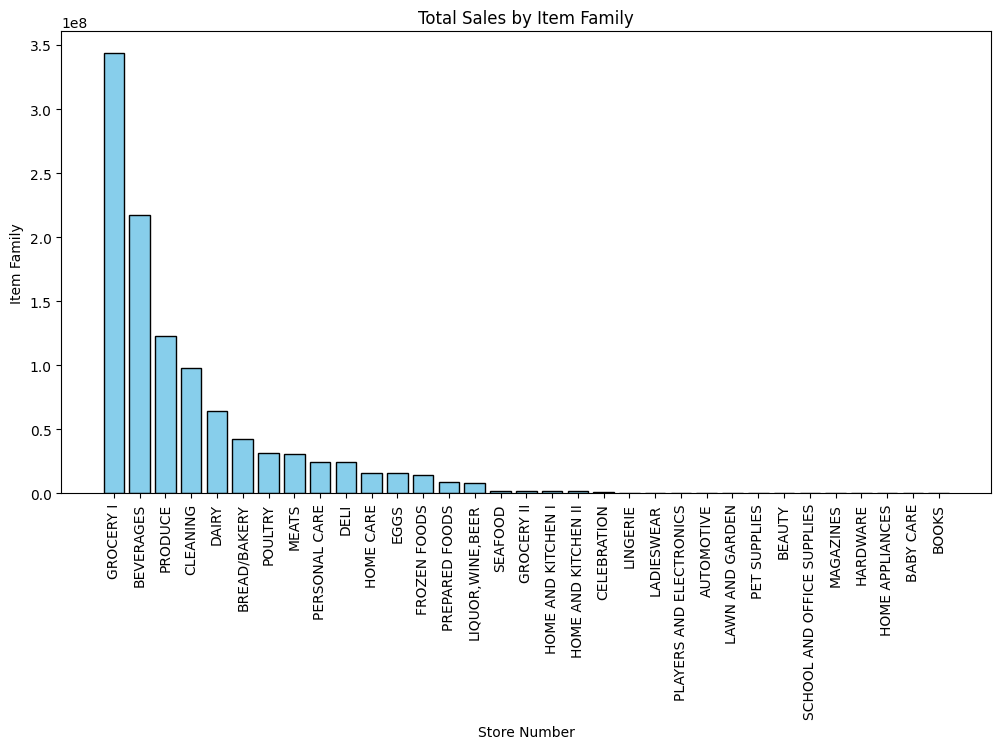

In [55]:

# sales_by_item = train_df.groupby('family')['unit_sales'].sum().reset_index()
sales_by_item = train_df.groupby('family')['unit_sales'].sum().reset_index()
sales_by_item = train_df.groupby('family')['unit_sales'].sum().sort_values(ascending=False).reset_index()
sales_by_item['family'] = sales_by_item['family'].astype('str')

plt.figure(figsize=(12, 6))
plt.bar(sales_by_item['family'], sales_by_item['unit_sales'], color='skyblue', edgecolor='k')
plt.xlabel('Store Number')
plt.ylabel('Item Family')
plt.title('Total Sales by Item Family')
plt.xticks(rotation=90)
plt.show()